# Volatility Strategy

Trying this: https://www.reddit.com/r/Trading/comments/ujy1x8/volatility_trading_algorithm_for_shortterm/.

In [1]:
from datetime import datetime, timedelta
import logging

from alpaca.data.timeframe import TimeFrame, TimeFrameUnit
import pandas as pd
from talib import ATR, EMA, RSI

from examples.data import (
    download_bars,
    separate_bars_by_symbol,
    split_multi_index_bars_train_test,
)

from bacta.backtester import EventBacktester, Order, Side
from bacta.utilities import dash
from bacta.utilities.logger import get_logger, set_log_level

set_log_level(logging.DEBUG)

/usr/local/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class VolatilityStrategy(EventBacktester):
    """
    Backtester that uses the Keltner Channel to make decisions.
    """

    def __init__(self, active_symbols, cash, **kwargs):
        super().__init__(active_symbols, cash, **kwargs)
        self.short_ema_period = 21
        self.long_ema_period = 200
        self.rsi_period = 14

    def precompute_step(self, bars: pd.DataFrame):
        """
        Preload the indicators for the backtest.
        """
        split_bars = separate_bars_by_symbol(bars)

    def update_step(self, bars: pd.DataFrame, index: pd.Timestamp):
        """
        Update the state of the backtester.
        """
        split_bars = separate_bars_by_symbol(bars)
        

    def generate_orders(self, bar: pd.DataFrame, index: pd.Timestamp) -> list[Order]:
        """
        Make a decision based on the prices.
        """
        close_prices = bar.loc[:, "close"]
        # short ema is 21, long ema is 200
        # rsi is 14
        # if rsi is > 75 and short ema is > long ema, then short
        # if rsi is < 25 and short ema is < long ema, then long
        orders = []
        
        return orders


In [3]:
symbols = ["DTE", "DUK"]

bars = download_bars(
    symbols,
    start_date=datetime(2024, 1, 1),
    end_date=datetime(2025, 7, 31),
    timeframe=TimeFrame(1, TimeFrameUnit.Hour)
)
# split the bars into train and test
train_bars, test_bars = split_multi_index_bars_train_test(
    bars, split_ratio=0.9)

# create the backtester
backtester = VolatilityStrategy(
    symbols,
    cash=3000,
    allow_short=True,
    min_cash_balance=100,
    allow_overdraft=False,
    min_trade_value=1,
    market_hours_only=True,
    transaction_cost=0.000,
    transaction_cost_type="percentage",
)

# preload the train bars
backtester.load_train_bars(train_bars)

# run_backtest the backtest
backtester.run_backtest(test_bars)

# plot the order and state history
#print(dash("order history"))
#print(backtester.get_history())
#print(dash("state history"))
#print(backtester.get_state_history())

[2025-08-11 17:45:29][DEBUG] Loading data/DTEDUK_2024-01-01_2025-07-31_1Hour.pkl
[2025-08-11 17:45:29][DEBUG] Initializing backtester with active symbols: ['DTE', 'DUK'], cash: 3000, allow_short: True, min_cash_balance: 100, min_trade_value: 1, market_hours_only: True
[2025-08-11 17:45:29][INFO] Train bars have been previously loaded. Concatenating with test bars...
[2025-08-11 17:45:29][INFO] Running backtest over 15191 bars from 2025-06-03 07:00:00-04:00 to 2025-07-30 19:00:00-04:00...
[2025-08-11 17:45:35][INFO] Closing positions at 2025-07-30 16:00:00-04:00...


,cash,portfolio_value,DTE,DUK
0,3000.0,3000.0,0.0,0.0
2025-06-03 07:00:00-04:00,3000.0,3000.0,0.0,0.0
2025-06-03 08:00:00-04:00,3000.0,3000.0,0.0,0.0
2025-06-03 09:00:00-04:00,3000.0,3000.0,0.0,0.0
2025-06-03 10:00:00-04:00,3000.0,3000.0,0.0,0.0
...,...,...,...,...
2025-07-30 12:00:00-04:00,3000.0,3000.0,0.0,0.0
2025-07-30 13:00:00-04:00,3000.0,3000.0,0.0,0.0
2025-07-30 14:00:00-04:00,3000.0,3000.0,0.0,0.0
2025-07-30 15:00:00-04:00,3000.0,3000.0,0.0,0.0


In [4]:
# plot the performance
print(dash("performance"))
print(backtester.pretty_format_performance())

- performance ------------------------------------------------------------------
Backtest Performance:
- Return on Investment: 0.00%
- vs. Buy and Hold Return: 1.40%
- Sharpe Ratio: 0.00
- Max Drawdown Percentage: 0.00%

- Start Portfolio Value: $3000.00
- End Portfolio Value: $3000.00
- Min Portfolio Value: $3000.00
- Max Portfolio Value: $3000.00
- Min Cash Balance: $3000.00
- Max Cash Balance: $3000.00
- Win Rate: 0.00%

- Number of Orders: 0
- Number of Winning Trades: 0
- Number of Losing Trades: 0
- Avg Trade Return: nan%
- Largest Win: nan% ($nan)
- Largest Loss: 0.00% ($nan)
- Max Consecutive Wins: nan
- Max Consecutive Losses: nan

- Trading Period Start: 2025-06-03 07:00:00-04:00
- Trading Period End: 2025-07-30 16:00:00-04:00
- Trading Period Length: 57 days 09:00:00
- Time in Market: 0.00%


plotting...


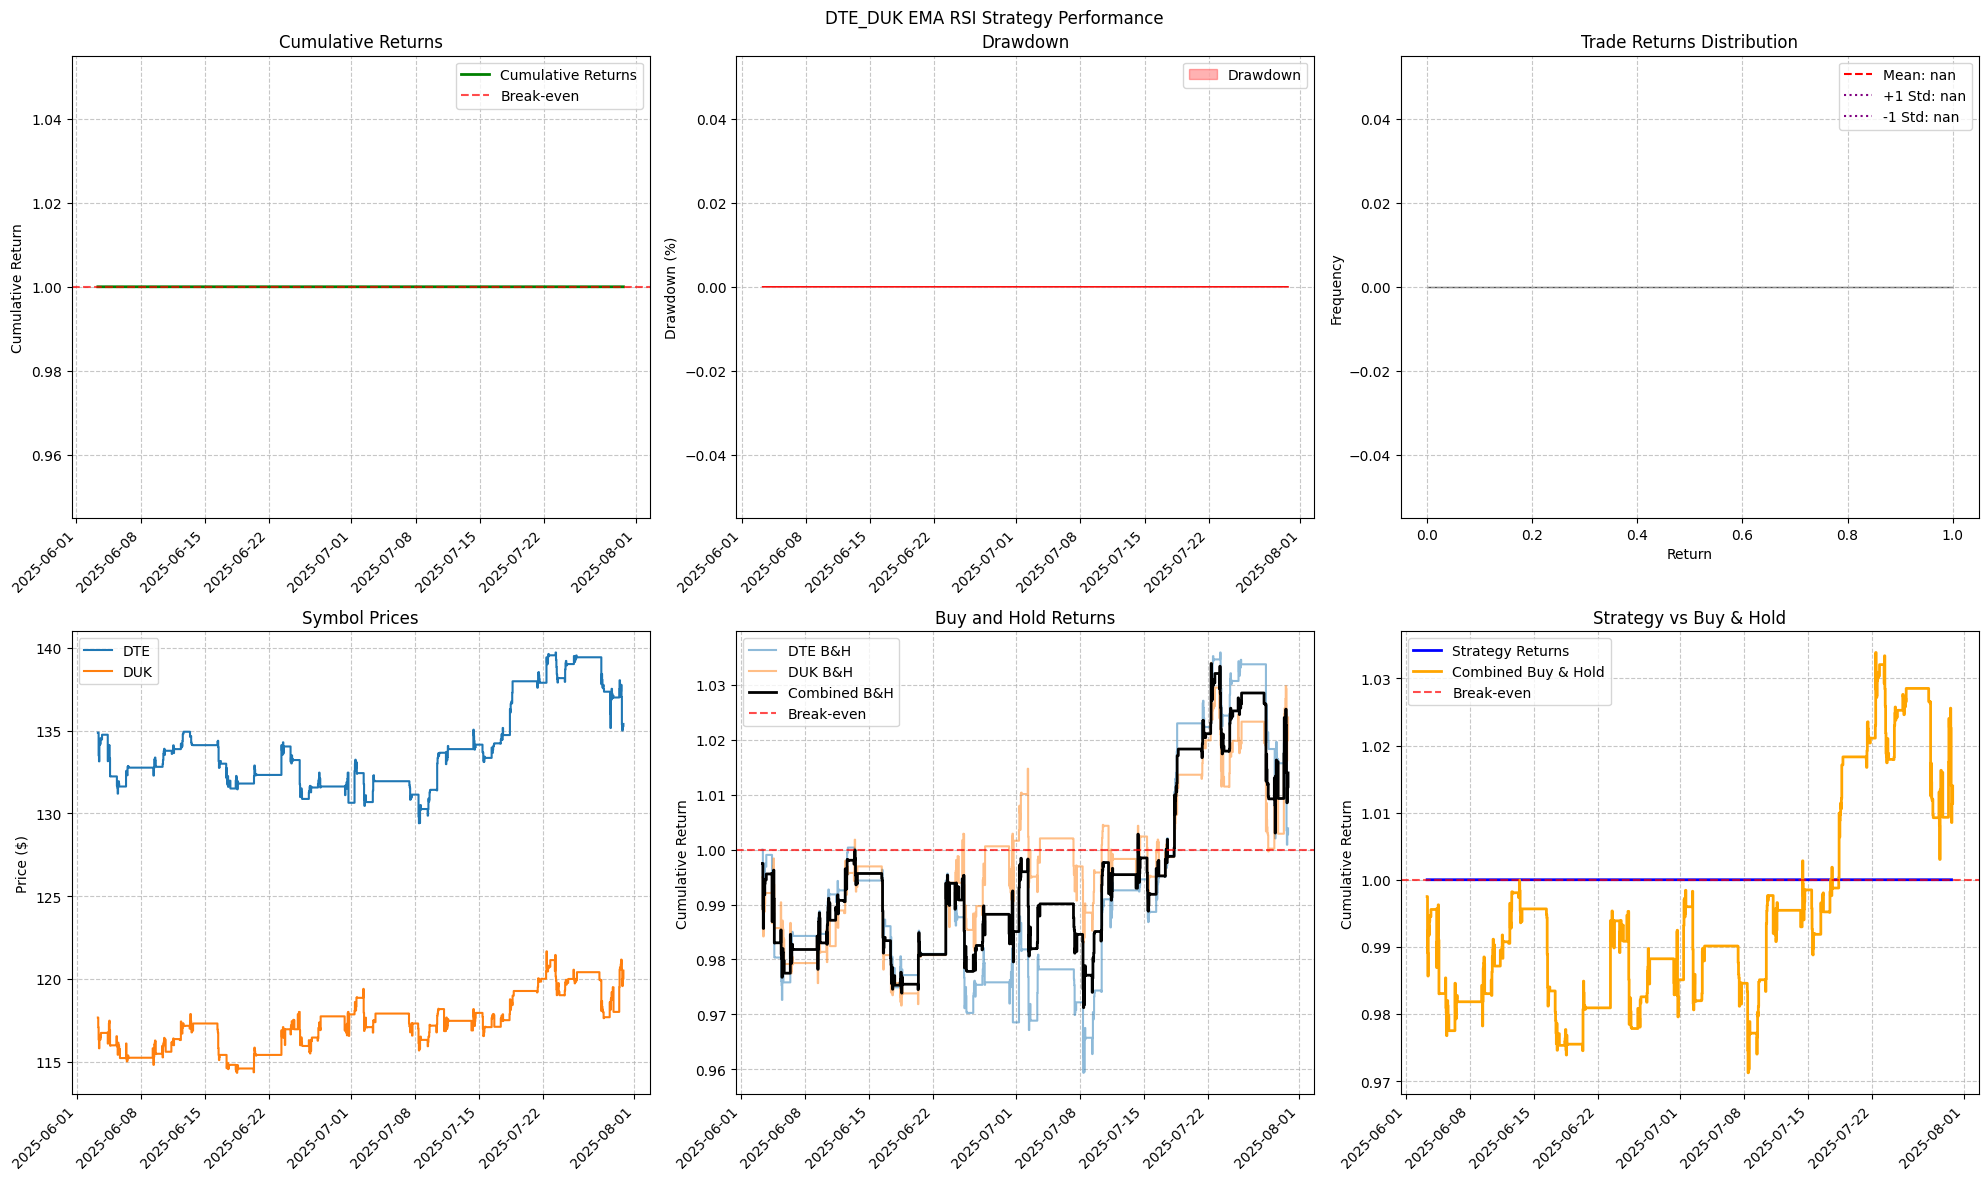

In [5]:
# Plot the results
print("plotting...")
backtester.plot_performance_analysis(
    title="_".join(symbols) + " EMA RSI Strategy Performance", show_plot=False)

In [6]:
backtester.plot_trade_history(title="_".join(
    symbols) + " EMA RSI Strategy Trades", show_plot=False)

[2025-08-11 17:45:37][WARNING] No order history available for plotting trade history


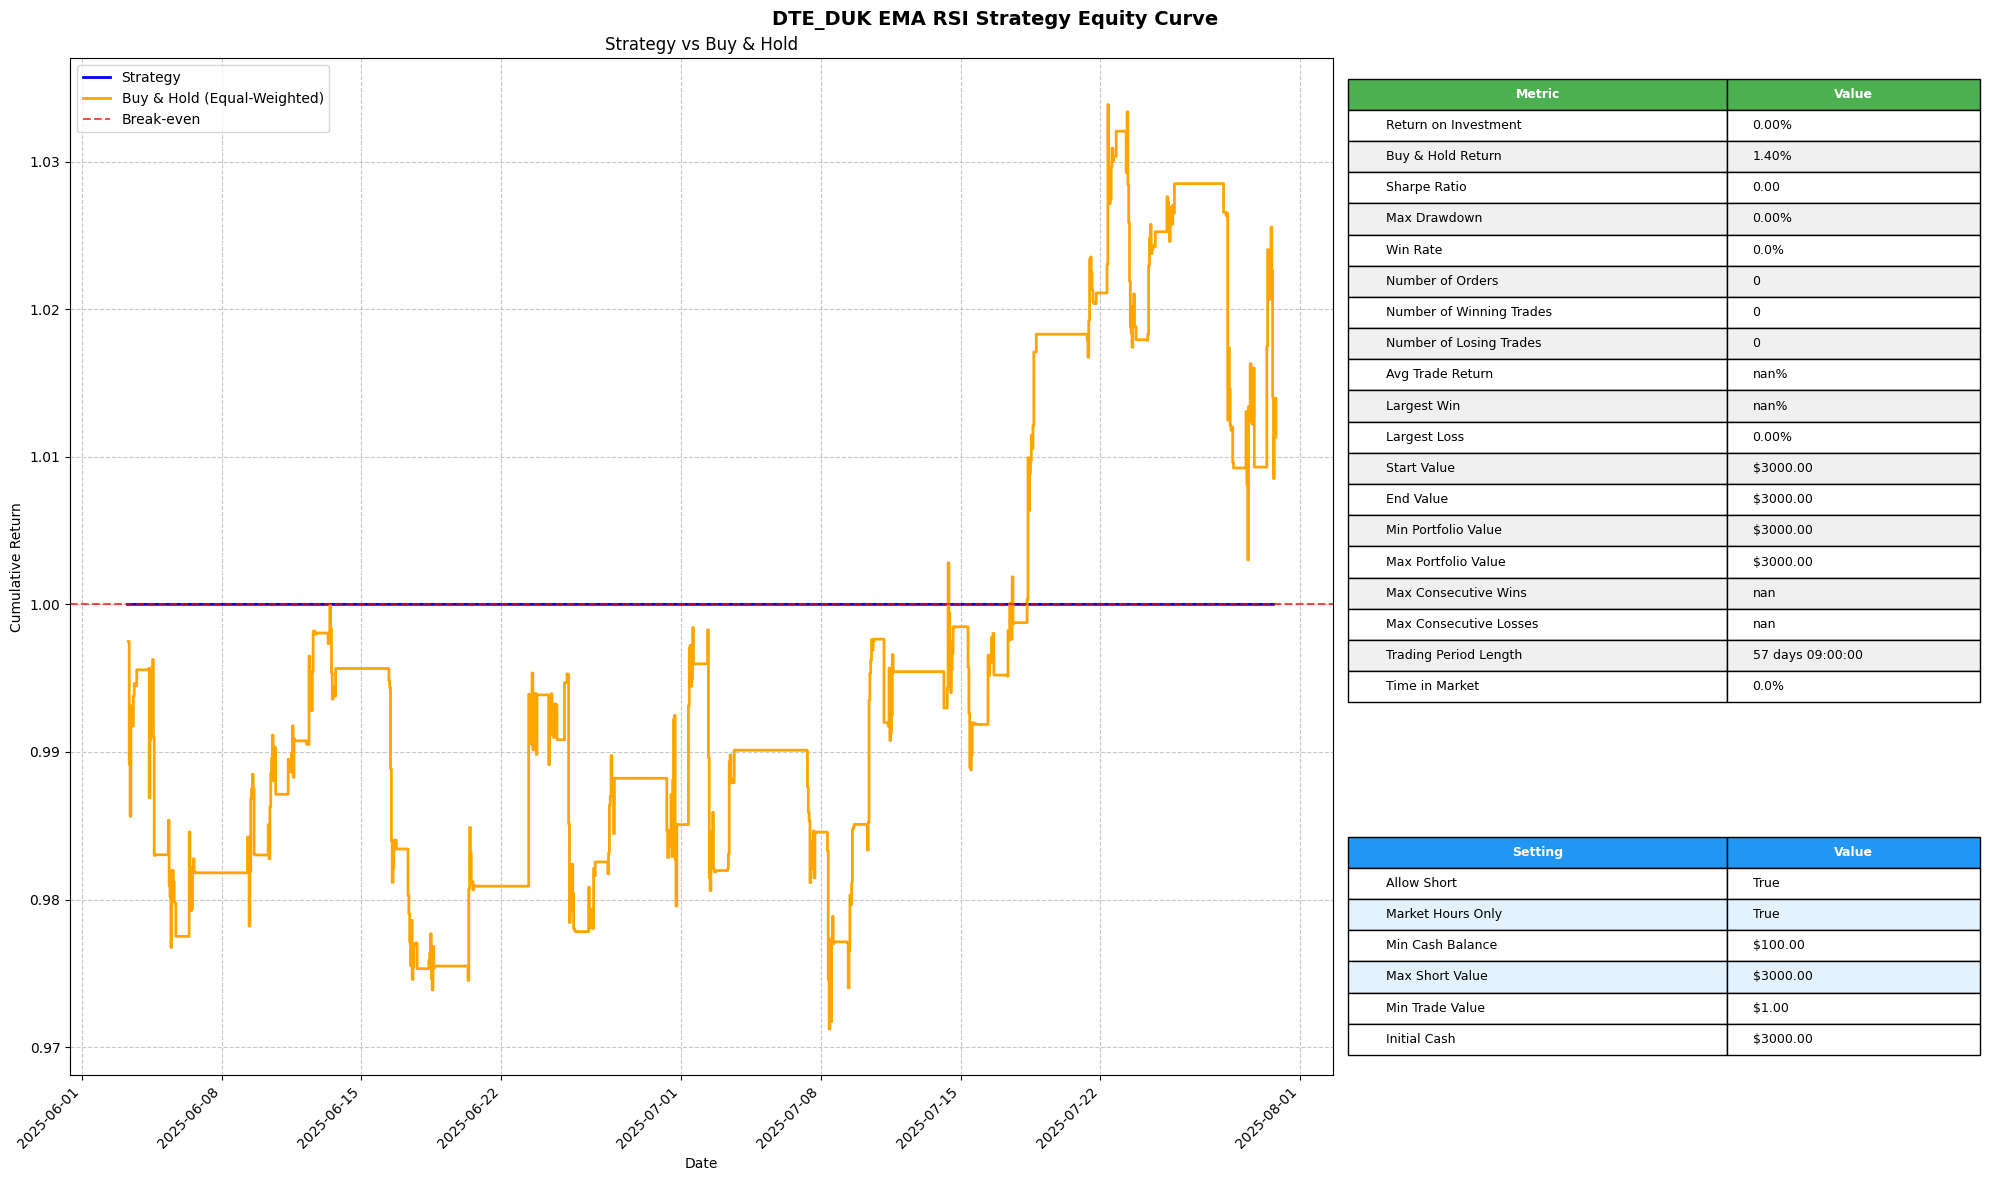

In [7]:
backtester.plot_equity_curve(
    title="_".join(symbols) + " EMA RSI Strategy Equity Curve", show_plot=False
)